In [3]:
# =============================
# 1. Upload your Basketball Reference CSV
# =============================
from google.colab import files
import pandas as pd

print("Please upload your saved 'lineups.csv' file...")
uploaded = files.upload()

# Load the file
df = pd.read_csv("lineups.csv")
print("Data loaded! First 5 rows:")
df.head()


Please upload your saved 'lineups.csv' file...


Saving lineups.csv to lineups.csv
Data loaded! First 5 rows:


,Rk,Lineup,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,...,ORB%,DRB,DRB%,TRB,TRB%,AST,STL,BLK,TOV,PF
0,1,B. Adebayo | J. Butler | T. Herro | H. Highsmi...,188:29:00,5.2,1.2,3.5,-0.006,3.5,8.2,0.008,...,5.5,3.7,5.5,3.0,6.6,2.2,1.3,-1.4,0.8,0.8
1,2,B. Adebayo | T. Herro | D. Mitchell | K. Ware ...,120:26:00,-1.0,-1.9,-3.5,-0.003,-2.3,-2.9,-0.033,...,-2.2,0.0,-2.2,-0.4,-1.0,-0.1,-0.5,3.7,-0.2,-1.9
2,3,B. Adebayo | T. Herro | H. Highsmith | J. Jaqu...,119:49:00,-16.4,-9.4,-8.2,-0.062,-5.2,-0.6,-0.132,...,-14.8,-10.2,-14.8,-8.5,-17.3,-3.4,3.9,-3.7,-2.7,-3.3
3,4,B. Adebayo | J. Butler | T. Herro | N. Jović |...,94:36:00,-20.3,-10.3,-3.3,-0.095,0.1,2.0,-0.017,...,-6.5,-5.8,-6.5,-3.8,-8.2,0.3,-1.7,-3.3,1.2,-3.2
4,5,B. Adebayo | T. Herro | H. Highsmith | D. Robi...,90:24:00,2.9,-1.2,-11.7,0.048,4.0,-0.1,0.104,...,-3.8,4.6,-3.8,0.8,1.8,2.5,-5.1,-0.1,9.6,-1.7


In [4]:
# =============================
# 2. Clean column names
# (Basketball Reference adds spaces and % signs)
# =============================
# Example: turns "NetRtg" or "ORtg" into clean names
df.columns = [col.strip().replace("%", "Pct").replace(" ", "_") for col in df.columns]
df.head()


,Rk,Lineup,MP,PTS,FG,FGA,FGPct,3P,3PA,3PPct,...,ORBPct,DRB,DRBPct,TRB,TRBPct,AST,STL,BLK,TOV,PF
0,1,B. Adebayo | J. Butler | T. Herro | H. Highsmi...,188:29:00,5.2,1.2,3.5,-0.006,3.5,8.2,0.008,...,5.5,3.7,5.5,3.0,6.6,2.2,1.3,-1.4,0.8,0.8
1,2,B. Adebayo | T. Herro | D. Mitchell | K. Ware ...,120:26:00,-1.0,-1.9,-3.5,-0.003,-2.3,-2.9,-0.033,...,-2.2,0.0,-2.2,-0.4,-1.0,-0.1,-0.5,3.7,-0.2,-1.9
2,3,B. Adebayo | T. Herro | H. Highsmith | J. Jaqu...,119:49:00,-16.4,-9.4,-8.2,-0.062,-5.2,-0.6,-0.132,...,-14.8,-10.2,-14.8,-8.5,-17.3,-3.4,3.9,-3.7,-2.7,-3.3
3,4,B. Adebayo | J. Butler | T. Herro | N. Jović |...,94:36:00,-20.3,-10.3,-3.3,-0.095,0.1,2.0,-0.017,...,-6.5,-5.8,-6.5,-3.8,-8.2,0.3,-1.7,-3.3,1.2,-3.2
4,5,B. Adebayo | T. Herro | H. Highsmith | D. Robi...,90:24:00,2.9,-1.2,-11.7,0.048,4.0,-0.1,0.104,...,-3.8,4.6,-3.8,0.8,1.8,2.5,-5.1,-0.1,9.6,-1.7


In [5]:
# --- Rank each category (1 = best) ---
df["PTS_rank"] = df["PTS"].rank(ascending=False)       # higher PTS is better
df["eFG_rank"] = df["eFGPct"].rank(ascending=False)    # higher eFG% is better
df["TRB_rank"] = df["TRBPct"].rank(ascending=False)   # higher REB% is better

# --- Combined Rank ---
df["Combined_Rank"] = df["PTS_rank"] + df["eFG_rank"] + df["TRB_rank"]

# --- Sort by Combined Rank ---
df_sorted = df.sort_values("Combined_Rank")

# --- Show Top 5 ---
print("🔥 Top 5 Lineups by Rank-Sum (PTS + eFG% + TRB%):")
print(df_sorted.head(5)[["Lineup", "PTS", "eFGPct", "TRBPct",
                         "PTS_rank", "eFG_rank", "TRB_rank", "Combined_Rank"]])

# --- Show Full Table (all lineups ranked) ---
print("\n📊 Full Ranking of All Lineups:")
print(df_sorted[["Lineup", "PTS", "eFGPct", "TRBPct",
                 "PTS_rank", "eFG_rank", "TRB_rank", "Combined_Rank"]])


🔥 Top 5 Lineups by Rank-Sum (PTS + eFG% + TRB%):
                                               Lineup   PTS  eFGPct  TRBPct  \
17  B. Adebayo | K. Anderson | T. Herro | H. Highs...  55.3   0.175    16.3   
11  B. Adebayo | A. Burks | T. Herro | K. Ware | A...  38.1   0.211    15.9   
9   B. Adebayo | T. Herro | J. Jaquez | N. Jović |...  11.9   0.090     5.1   
18  B. Adebayo | J. Jaquez | N. Jović | J. Richard...  21.9   0.063     2.4   
12  B. Adebayo | J. Butler | T. Herro | H. Highsmi...  18.1  -0.029    12.3   

    PTS_rank  eFG_rank  TRB_rank  Combined_Rank  
17       1.0       2.0       1.0            4.0  
11       2.0       1.0       2.0            5.0  
9        6.0       3.0       7.0           16.0  
18       3.0       6.0      10.5           19.5  
12       4.0      13.0       4.0           21.0  

📊 Full Ranking of All Lineups:
                                               Lineup   PTS  eFGPct  TRBPct  \
17  B. Adebayo | K. Anderson | T. Herro | H. Highs...  55.3   0.1

In [6]:
import matplotlib.pyplot as plt

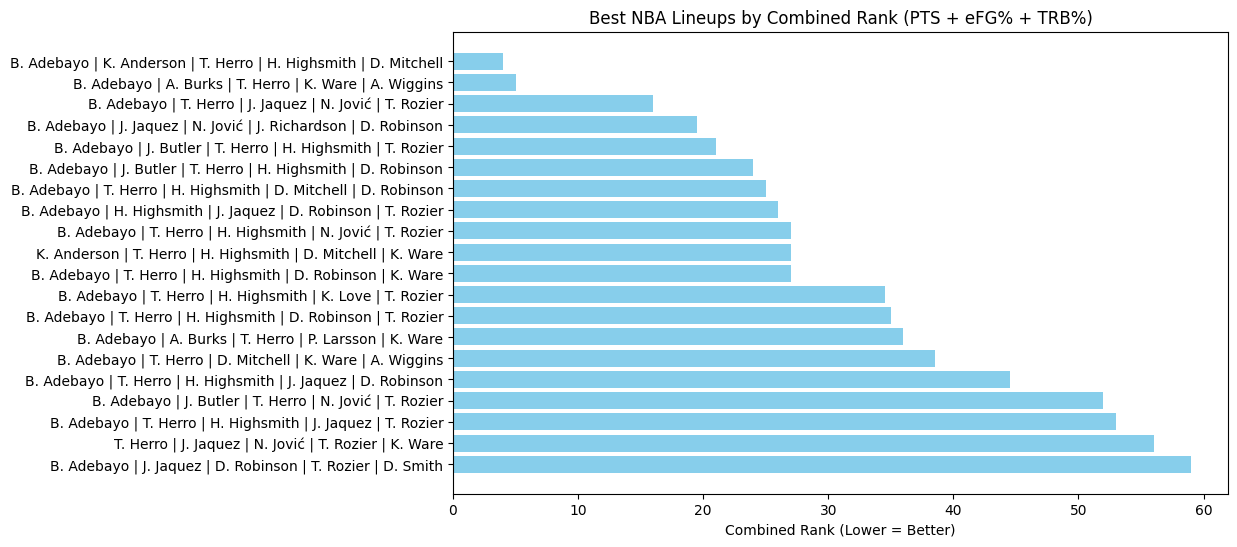

In [7]:
# --- Visualization ---
plt.figure(figsize=(10,6))
plt.barh(df_sorted["Lineup"], df_sorted["Combined_Rank"], color="skyblue")
plt.gca().invert_yaxis()  # so best lineup is at the top
plt.xlabel("Combined Rank (Lower = Better)")
plt.title("Best NBA Lineups by Combined Rank (PTS + eFG% + TRB%)")
plt.show()
